# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

* No, it doesn't move.
* Agent doesn't move at a red light and rewarded + for a few steps (usually 2 steps). At the next steps (usually 2 steps), the agent is rewarded - since the light is green but the agent doesn't move.
* For the red light the reward is +, since the agent should not move and doesn't move. For the green light the reward is -, since the agent can move but choose to not move. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* agent.py

env = Environment(num_dummies=10)
  num_dummies shows the number of other cars in the simulation. The above expression ensures 10 other cars to be in the simulation. 

env = Environment(num_dummies=2, grid_size=(4,4))
  grid_size shows the grid size. The above expression ensures the grid size to be 4*4.
  
env = Environment(verbose=True)
  If Verbose = true simulation output shows more detail. Output for each step looks like this: 
  
Environment.step(): t = 15
Environment.act() [POST]: location: (3, 5), heading: (0, -1), action: None, reward: 2.69376761398
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': None, 'deadline': 10, 't': 15, 'action': None, 'reward': 2.6937676139756865, 'waypoint': 'left'}
!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.69)
Agent not enforced to meet deadline.

sim = Simulator(env, update_delay=5) shows time (in seconds) between actions. 

sim = Simulator(env, display=False) doesn't show the simulation window (pygame window)

sim = Simulator(env, log_metrics=True)
creates a txt and excel file under logs directory. The files show the following values:  trial,testing,parameters,initial_deadline,final_deadline,net_reward,actions,success


* act


* Display procedures:

render_text: This is the non-GUI render display of the simulation. Simulated trial data is rendered in the terminal/command prompt by this procedure.

render: This is the GUI render display of the simulation. 
            

* East-West 


  

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


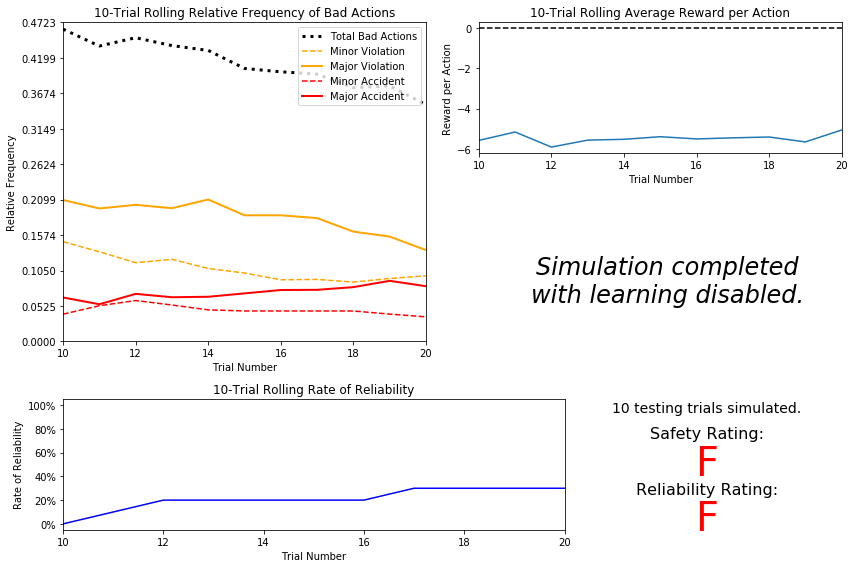

In [4]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

light, left, right, oncoming features are relevant for learning safety. waypoint and deadline is relevant for learning efficiency. 

To reach the destination, the agent should be able to go to forward direction, also should be able to turn left and right. For these actions to be done safely, the agent should know if there is car on left, right and oncoming directions. If there is a car oncoming and we know it will turn left, turning right can be dangerous. It's clear the light is again so important for safety. 

Waypoint is the direction the agent should go. If waypoint is not known, the agent goes nowhere, just searches for the destination. Deadline is another factor that is relevant for efficiency. If there is no deadline, agent can learn but inefficiently.  

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

state=(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'], deadline)

* waypoint can be 'right', 'forward', 'left'

* inputs['light'] can be 'red' or 'green'

* inputs['left'], inputs['right'] and inputs['oncoming'] can be None, 'forward', 'left', 'right'

* deadline can be 25,24,23,22,...1

The size of the space is 3 x 2 x 4 x 4 x 4 x 25 = 9600. This means there are 9600 possible states! There are 20 training trials and 25 steps in each trial... No, driving agent can't learn a policy for each possible state. The agent can learn a policy for each possible state but training trials should be really really high. 

-----
I will use these features: state=(waypoint, inputs['light'], inputs['left'], inputs['oncoming']). The size of the space is 3 x 2 x 4 x 4 = 96. This seems a reasonable combination.  

----
Reviewer comment:

Deadline is not necessary, and in fact, causes a drastic increase in the dimension of the state space. It is also of note that including deadline could influence the agent to make illegal moves to meet the deadline.

US traffic laws make right unnecessary. This said, while excluding right makes sense for a human, including right makes the problem closer to one an actual AI might face. Actual traffic laws are far too complex to explain in a series of if-then statements, not to mention that many human drivers treat traffic laws as "flexible". The spirit of the project is for the agent to learn that right is not necessary. The agent should be able to in less than 400 trials, depending upon your learning rate and exploration decay rate.

In eliminating features beyond deadline, your project is verging on being a knowledge-based approach to AI [reference]. This is a reinforcement learning project which means you must teach the AI to learn, not program its behavior. You are technically allowed to restrict its input to some extent, but it should be choosing actions based upon its own learning. Note that this may take hundreds of trials to be successful.

In terms of learning the theory behind the project, here you only have six inputs. If you had 6000 inputs, would you know which features to eliminate? In my opinion, the best solution to this project is one in which has many features as possible are included and the agent is allowed to learn for itself which features are important. If you were to include all four inputs and the waypoint feature, it wouldn't take you more than 400 or 500 trails to train your agent. In this reinforcement learning task, its fine to run hundreds or thousands of trials. Tesla collected hundreds of millions of miles of data before it activated its self-driving car software!

Your calculation of dimension is correct. 96 states is a reasonable number of states to learn in a with a good number of training trials and a good epsilon decay rate.
You might think about a Monte Carlo simulation to verify this. From there you might try different numbers of steps to see if every state could be visited via random exploration. Given a number of steps, how many trials are needed to reach that number?

import numpy as np

import random

def percent_visited(steps, states):

  visited = np.zeros(states, dtype=bool)
  
  for _ in range(steps):
  
    current_state = random.randint(0, states-1)

    visited[current_state] = True
    
  return sum(visited)/float(states)

Each step here is a decision made by the agent. This is for a state space of dimension 500. Given that 2000 steps are approximately needed to visit every state, how many trials would be needed?

-----
Reviewer comment:

* https://engineering.ucsb.edu/~shell/che210d/Monte_Carlo.pdf

* http://www.pythonforfinance.net/2016/11/28/monte-carlo-simulation-in-python

* http://www.science.oregonstate.edu/~landaur/INSTANCES/WebModules/5_RandomWalk/RandomWalkFiles/Pdfs/RandomWalk.pdf


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

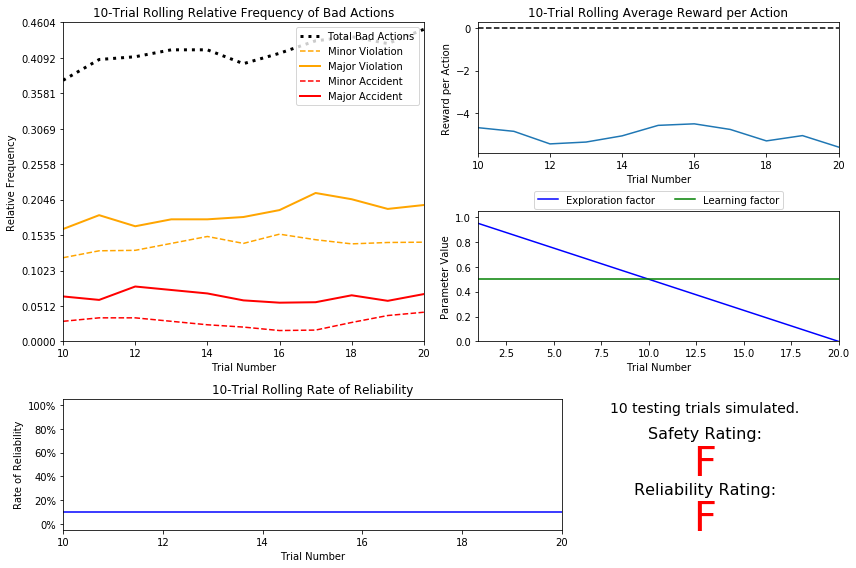

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

* Learning factor is 0.5 for both basic driving agent and the default Q-learning agent. In addition, safety rating is still F although the number of bad actions decreased. This is because the safety rating is F when only one major accident is done. This is quite hard to achieve.
* Agent requires 20 training trials. epsilon = 1 and epsilon is decreased by 0.05 (decay function) in each trial. 1, 0.95, 0.90, ... 0.05, 0 --> 20 steps. 
* Yes. The graph that shows "Exploration and Learning Factor" wrt "Trial Number" shows this.
* Yes. As new trials are finished, relative frequency of Bad Actions decreases. This is shown in the "10-Trial Rolling Relative Frequency of Bad Actions" graph. "10-Trial Rolling Average Reward Per Action" graph shows that average reward reaches to almost 0 at the end of the training trials.
* Although the reliability increased a little bit but reliability rate is still F, safety rating is also still F. This is because getting high safety rating is quite hard to achieve. In fact number of bad actions are decreased...

----
Reviewer comment:

How long do you think it will take for the average reward to be positive?

If you have a look at your log file sim_default-learning.txt you can see that there are many states that your agent has not yet learned. This would show these states have not been visited by the agent.

Your state space has a dimension of approximately 100 (Note that it will never actually need to consider when waypoint == None). At this point, you have done very little exploration. Your agent is learning, but it hasn't done enough exploration.

---
Reviewer comment:

Your initial Q-Learning driving agent is showing signs of the agent learning even when using just default parameters: the frequency of bad actions is slightly decreasing, signaling potential convergence (if you had kept the trials going).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

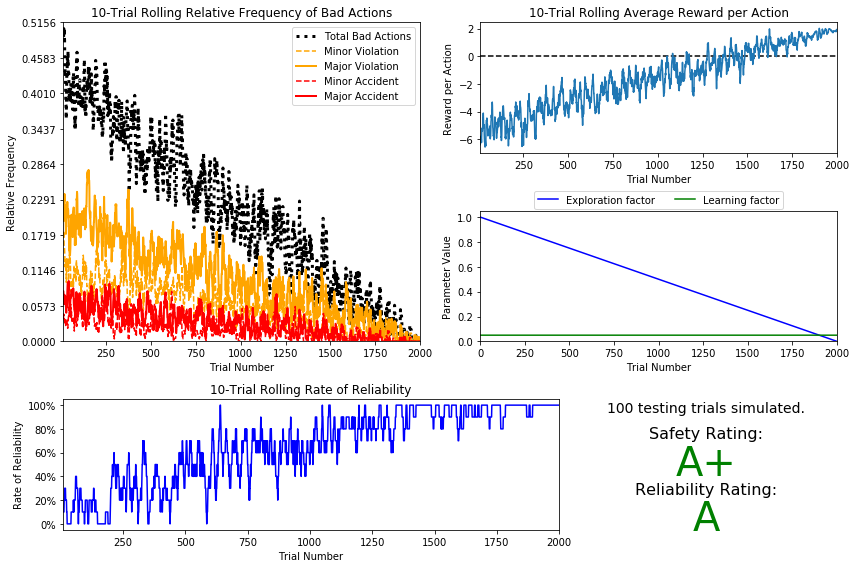

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

* Decaying function I used was e = e - 0.0005 (I feel cos function would behave better, but didn't try).
* Approximately 2000 training trials were needed for my agent before testing.
* Epsilon = 1 and alpha = 0.05. In fact I didn't changed the value of the epsilon and alpha. I set epsilon tolerance = 0.001. 
* Default Q-learner'a safety and reliability ratings were F and C, respectively. Safety and reliability of improved Q-learner is A+ and A.
* Yes, I would. All graphs above show Q-learner successfully learned an appropriate policy. Number of bad actions drops by the number of trials, average reward per action increases incrementally, rate of reliability increases as the number of trials increase.
* Yes, I am satisfied. Safety rating is A+ which means "agent commits no traffic violations, and always chooses the correct action." and realiability rating is A which means "agent reaches the destination on time for at least 90% of trips.". This result is acceptable I guess.

----
Reviewer comment:

Tuning these parameters is generally through trial and error. However, generally, it is a good idea to keep epsilon has high as possible over many training trials (that is, to decrease epsilon very slowly) as this will give your agent more opportunities to explore more states. In this regard, you are right, the cosine function would work well for training the agent. While decreasing tolerance level will also extend the number of training trials, it doesn't necessarily mean your agent will continue to explore (especially for non-linear decay functions) as exploration depends on higher values of epsilon. Extending the number of training trials by lowering tolerance while keeping epsilon in the later trials relatively low will allow your agent to exploit the policies already in the Q-table.
When adjusting your alpha, an alternative to choosing one constant rate is to implement a decay function, which will allow you to begin with a high learning rate and decrease it over the course of training trials. Beginning with a higher learning rate will attribute more weight to new results, and steadily lowering it to a relatively small number will allow your cab to gradually switch to an exploitation of the Q-table and policies.

----
Reviewer comment:

Considering you ran over 2000 trials you should be able to include right in your input, and have the agent learn that it is not necessary. There is an interesting discussion to be had about reducing the size of the state space by eliminating inputs versus doing more exploration and letting the agent learn. In terms of approaches to AI, not including features is a knowledge-based or heuristic approach. It was the approach to AI until very recent advances in computational power have made learning-based approaches to AI feasible. The RL project is intended to be a learning-based approach to AI. Sure you could eliminate features that are redundant or even irrelevant or develop sets of heuristics (if-then statements about what the agent should do), but if you do this is not reinforcement learning). Reinforcement learning is where your agent learns what rules to follow without you telling it.
Interestingly, in this light, not using deadline is appropriate not because it blows up the dimension of the state space, but because it actually might shift the goals of the agent so that breaking safety rules might be “ok” if the deadline has almost expired!

----
Reviewer comment:
Your results are impressive--your agent has reached 100% in reliability rate. Also, you can see that rewards (mostly) hover around +2, which is the highest positive reward possible:


        if violation == 0:
            if action == agent.get_next_waypoint(): # Was it the correct action?
                reward += 2 - penalty # (2, 1)
            elif action == None and light != 'green': # Was the agent stuck at a red light?
                reward += 2 - penalty # (2, 1)
            else: # Valid but incorrect
                reward += 1 - penalty # (1, 0)

Good to see you've changed the number of testing trials to 100. This increases the confidence of your agent and the accuracy of your ratings (so one run will not yield a different rating than another).

One suggestion for further fine-tuning is to use an alpha decay function so that you can control the exploration-exploitation balance. Below are some links for further reading (in particular, the last paper explores the relationship between the alpha used and the convergence rate):

* http://papers.nips.cc/paper/1944-convergence-of-optimistic-and-incremental-q-learning.pdf

* https://articles.wearepop.com/secret-formula-for-self-learning-computers

* http://ftp.bstu.by/ai/To-dom/My_research/Papers-2.1-done/RL/0/FinalReport.pdf

* http://www.jmlr.org/papers/volume5/evendar03a/evendar03a.pdf


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._
 
2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

1.
--------------
I defined the state of our agent as a tuple: state=(waypoint, inputs['light'], inputs['left'], inputs['oncoming']). A state gives us information about:

- Waypoint: The direction the agent should drive leading to the destination
- Light: The color of the lightLeft: The intended direction of travel for a vehicle to the Smartcab's left, None if no vehicle is present 
- Oncoming: The intended direction of travel for a vehicle across the intersection from the Smartcab, None if no vehicle is present.

Possible actions for our agent are:

- Left: The agent can turn left
- Right: The agent can turn right
- Forward: The agent can go forward
- None: The agent stops/stays idle.

A pair of a state and an action is called a state-action pair: a policy. 

Our agent chooses an action from all possible actions (Left, Right, Forward, None) in a state. This means agent can turn left, right, go forward and stop. The best action that the agent can choose in order to maximize the reliability and safety ratings is the action with the highest reward. This action is called optimal action.

A pair of a state and the optimal action(s) for that state is called optimal policy.

Optimal policy:

  If the light is read:
 
    Being idle is the optimal action. This guarantees that there will be no accident.

  Else (the light is read):

    If the waypoint is right:
    
      Turning right is the optimal action since turning right can not cause any accident.

    Else (the waypoint is left or forward):
  
      If the waypoint is forward:
    
        Going forward is the optimal action since going forward is safe. Of course, it's not safe as turning right (the previous case). 

      Else (the waypoint is left):
        
        If there is no car or a car that will turn left on the oncoming direction:
        
          Going left is the optimal action. Any car coming from left or forward will not have an accident with our agent, they are going to different directions.
          
        Else (there is a car that will turn right or go forward on the oncoming direction):
        
          If there is a car that will go forward on the oncoming direction:
            
            Going left can cause an accident since there is a car on the oncoming direction and going forward direction. Going right means going further away from the destination since the waypoint is left. So the optimal action is going forward.
            
          Else (there is a car that will turn right on the oncoming direction):
            
             Going left will probably cause an accident since the car on the oncoming direction will turn left. The optimal action seems to be going forward. 
             

2.
--------
'sim_improved-learning.txt' file


Many of the actions in the file are similar to what I expected. The following 3 policies are different than what I guessed. I thought going forward would be better action for this states but turning left seems to be the best action. 

('left', 'green', 'None', 'forward')
 -- forward : 0.56
 -- right : 0.74
 -- None : -5.09
 -- left : -19.42
 
('left', 'green', 'right', 'right')
 -- forward : 0.27
 -- right : 0.46
 -- None : -0.52
 -- left : -2.88
 
('left', 'green', 'forward', 'right')
 -- forward : 0.26
 -- right : 0.61
 -- None : -1.37
 -- left : -8.08

The following policy is also different than what I expected. I still think the best action is turning right for this state:

('right', 'green', 'right', 'right')
 -- forward : 0.36
 -- right : 0.25
 -- None : -0.8
 -- left : -1.02


3.
--------

The following line is the first line of sim_improved-learning.txt file.  

Example 1:

('right', 'green', 'forward', 'right')
 -- forward : 0.21
 -- right : 1.56
 -- None : -1.83
 -- left : -2.81

So the state ('right', 'green', 'forward', 'right') is the state which the agent should turn right, the light is green, on the left there is a car going forward, there is another car on the oncoming direction that will turn right. All possible actions are: 

* going forward: Reward=0.21. If the agent goes forward, possibly later can turn right for the destination since the waypoint is turning right. This is the second possible/optimal action the agent has since reward is 0.21 (the second highest reward).  

* turning right: Reward=1.56. The agent can turn right without any accident. Everything is ok to turn right. This is the optimal action the agent has so the reward is the best: 1.56. 

* being idle: Reward=-1.83. Since the reliability is so critical, being idle when the green light is on is not an acceptable action. If the agent stops, the remaining time will decrease and reliability rating will also decrease. This is the second worst action for this state.  

* turning left: Reward=-2.81. If the agent turns left, the agent will go further away from the destination. This is the worst action for this state so the reward is the worst.

Optimal action is turning right since it has the highest reward= 1.56. 

The state ('right', 'green', 'forward', 'right') and action=Right is the optimal policy.

Example 2:

Then I found the state ('right', 'green', 'forward', 'forward') in the file because I thought there will be similar rewards for the same actions except turning left. This is because the car coming from the forward direction does not matter except if it turns left.  

('right', 'green', 'forward', 'forward')
 -- forward : 0.26
 -- right : 1.80
 -- None : -1.71
 -- left : -11.26
 
The rewards for going forward, right and being idle are really similar. The reward for going left was -2.81 in the previous example, now, for this state it's decreased and became -11.26. This is what I expected.

Example 3:

In fact the state-action pairs similar to the following (when the light is red and the reward for not being idle is positive) surprised me. I was expecting there would be only negative rewards for not being idle when the light is red. There is 0.82 for going right for the following state. Although the agent is able to turn right at the red light (0.82), the highest Q-value is still for remaining idle (1.84). 

('forward', 'red', 'left', 'None')
 -- forward : -14.27
 -- right : 0.82
 -- None : 1.84
 -- left : -16.05
 
Example 4:

('left', 'green', 'None', 'None')
 -- forward : 0.85
 -- right : 0.81
 -- None : -5.04
 -- left : 1.85
 
The agent should go to left, the light is green, on the right and oncoming direction there is no car. Being idle is the worst action the agent can have since there is no traffic and the light is green. The best action is turning left, since the waypoint is left and there is no traffic at all.

Example 5:
I looked at sim_default-learning.txt file and saw such a line:
 
('forward', 'green', 'left', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
This line stays as it's created. That means the agent didn't learn for this state. I guess this is because the number of trials is quite small.

4.
--------
I found this line in the related file:

('right', 'green', 'right', 'right')
 -- forward : 0.36
 -- right : 0.25
 -- None : -0.8
 -- left : -1.02
 
The agent didn't learn the optimal policy for this state I guess. The agent should turn right. The light is green. There is a car on the left that will turn right, so no accident risk. There is a car on the oncoming direction that will turn right, so no accident risk. The optimal action should be turning right. But this action is the second possible action. 


----
Reviewer comment:

We see that a good agent generally learns the optimal policy, although there may be exceptions. Often these exceptions are due to the fact that the agent simply has not explored enough. Even with thousands of trials due to the random nature of state distribution, the agent may not have explored every state successfully.

In your suboptimal policy, you may see that the correct action was never explored. This is why it's important to run enough trials in order to let the agent explore all the different actions. Longer exploration would remedy both situations where a sub-optimal policy is learned.

Other times the agent learns a suboptimal policy because it first explores an action which is suboptimal but does yield positive rewards, and then repeatedly exploits that action. Later it may randomly explore the optimal policy, but at that point, the suboptimal policy will have a higher value in the Q-table. You've found a good example:

('right', 'green', 'right', 'right')
 -- forward : 0.36
 -- right : 0.25
 -- None : -0.8
 -- left : -1.02
 
The agent chose to move forward instead of following the waypoint at a green light. We will get some reward for simply moving on green, regardless of the waypoint, but it's not optimal. However, the 'forward' action will be regularly exploited until exploration occurs again. During the exploitation period, it will build up a significant lead on the optimal policy.

However, we also see that our agent has learned the policies well enough, to meet specifications (A ratings) for this project. This shows that while our agent may not learn the entire optimal policy, it might learn enough to be adequate for a given job.



-----
### Optional: Future Rewards - Discount Factor, `'gamma'
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

* Environment: The starting and ending points are changing in each trial - steps. If the starting and ending points were constant including future rewards would be critical. 

* Agent: The agent can only see the current intersection. If the agent was able to see the next intersections, it would add this information to it's learning process to decide which direction to go.


---
Reviewer comment:

You are correct that future rewards are negligible since the agent cannot see past the current intersection and that the environment is stochastic.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.